In [1]:
import numpy as np
from matplotlib import pyplot as plt

In [133]:
class KDTree:
    @staticmethod
    def new(data, curr_dim=0):
        if not len(data):
            return None
        data = np.array(sorted(data, key=lambda x: x[curr_dim]))
        tree = KDTree(
            coords=data[len(data)//2],
            dim=curr_dim,
            parent=None,
            right=build_kdtree(data[:len(data)//2], (curr_dim+1) % data.ndim),
            left=build_kdtree(data[len(data)//2+1:], (curr_dim+1) % data.ndim)
        )
        if tree.right:
            tree.right.parent = tree
        if tree.left:
            tree.left.parent = tree
        return tree
    
    def __init__(self, coords, dim, parent=None, right=None, left=None):
        self.coords = coords
        self.dim = dim
        self.parent = parent
        self.right = right
        self.left = left
        
    def search(self, other):
        if self.left is None and self.right is None:
            return self.coords
    
        if self.left is not None and self.coords[self.dim] <= other[self.dim]:
            return self.left.search(other)
        return self.right.search(other)

In [154]:
n = 100
k = 2
min_ = 0
max_ = 1000
data = np.random.randint(min_, max_, [n, k])
new = np.random.randint(min_, max_, 2)

In [155]:
tree = KDTree.new(data)

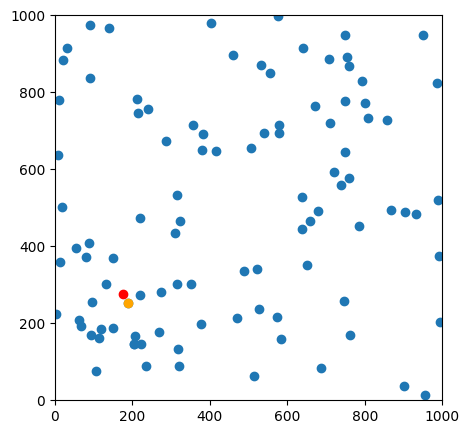

In [156]:
plt.figure(figsize=(5, 5))
plt.scatter(*data.T)
plt.scatter(*new.T, color='red')
plt.scatter(*tree.search(new), color='orange')
plt.ylim(min_, max_)
_ = plt.xlim(min_, max_)